In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


In [2]:
# Generate sample data
np.random.seed(42)
data_length = 1000
time = np.arange(data_length)
price = 100 + np.cumsum(np.random.randn(data_length))


In [3]:
# Reshape the data for scaling
price = price.reshape(-1, 1)


In [4]:
# Split data into train and test sets
train_size = int(len(price) * 0.8)
test_size = len(price) - train_size
train_data, test_data = price[0:train_size], price[train_size:]


In [5]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)


In [6]:
# Prepare data for LSTM model
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


In [7]:
look_back = 60  # Sequence length
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)


In [8]:
# Reshape input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [9]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/100
12/12 [==============================] - 15s 180ms/step - loss: 0.0468
Epoch 2/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0159
Epoch 3/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0109
Epoch 4/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0093
Epoch 5/100
12/12 [==============================] - 2s 143ms/step - loss: 0.0093
Epoch 6/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0085
Epoch 7/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0083
Epoch 8/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0078
Epoch 9/100
12/12 [==============================] - 2s 160ms/step - loss: 0.0073
Epoch 10/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0068
Epoch 11/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0069
Epoch 12/100
12/12 [==============================] - 2s 147ms/step - loss: 0.0066
Epoch 13/100

In [12]:
# Invert predictions to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])


In [13]:

# Evaluate model performance
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])


In [14]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 8.551995595497946
Mean Absolute Error: 2.7134532310584683


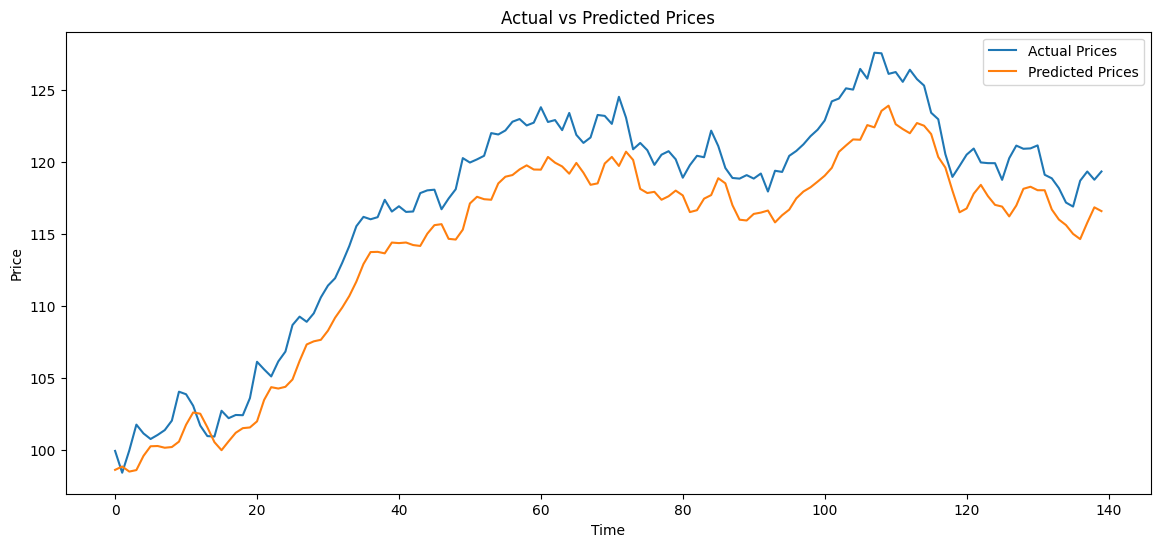

In [15]:
# Visualize predictions vs actual prices
plt.figure(figsize=(14, 6))
plt.plot(y_test[0], label='Actual Prices')
plt.plot(predictions[:, 0], label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()